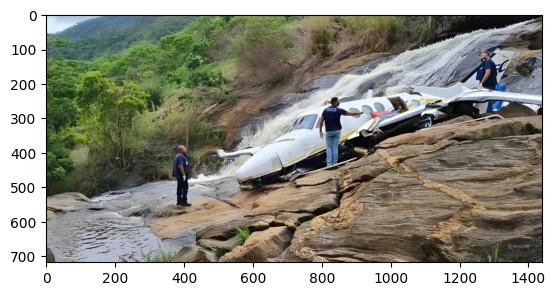

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('acidente_mendonca.jpeg'))

## Agrupa acidentes aeronáuticos em clusters definidos pelo modelo

Os dados utilizados nesse projeto foram analisados, limpos e tratados no projeto:
https://github.com/jairobernardesjunior/Cenipa_limpa_trata_armazena

São dados disponibilizados pelo Cenipa-Centro de Investigação e Prevenção de Acidentes Aeronáuticos da Força Aérea Brasileira.

## Faz o reconhecimento dos dados para selecionar as variáveis que vão ser incluidas no treinamento do modelo de clusterização de acidentes aeronáuticos.

In [15]:
# importa bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter('ignore')

In [16]:
# carrega arquivos em dataframes
df_acidentes_aero = pd.read_csv('arquivos_tratados/df_acidentes_aeronauticos.csv')

In [17]:
# verifica o tamanho do arquivo
df_acidentes_aero.shape

(9819, 45)

In [18]:
# reconhecendo as variáveis disponíveis
df_acidentes_aero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9819 entries, 0 to 9818
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ocorrencia_classificacao         9819 non-null   object 
 1   ocorrencia_cidade                9819 non-null   object 
 2   ocorrencia_uf                    9819 non-null   object 
 3   ocorrencia_pais                  9819 non-null   object 
 4   ocorrencia_aerodromo             9819 non-null   object 
 5   ocorrencia_dia                   9819 non-null   object 
 6   ocorrencia_hora                  9819 non-null   object 
 7   investigacao_status              8405 non-null   object 
 8   total_aeronaves_envolvidas       9819 non-null   int64  
 9   ocorrencia_saida_pista           9819 non-null   object 
 10  ocorrencia_latitude              9819 non-null   float64
 11  ocorrencia_longitude             9819 non-null   float64
 12  aeronave_matricula  

In [19]:
# confirma a inexistência de nulos
df_acidentes_aero.isnull().sum()

ocorrencia_classificacao              0
ocorrencia_cidade                     0
ocorrencia_uf                         0
ocorrencia_pais                       0
ocorrencia_aerodromo                  0
ocorrencia_dia                        0
ocorrencia_hora                       0
investigacao_status                1414
total_aeronaves_envolvidas            0
ocorrencia_saida_pista                0
ocorrencia_latitude                   0
ocorrencia_longitude                  0
aeronave_matricula                    0
aeronave_tipo_veiculo                 0
aeronave_fabricante                   0
aeronave_modelo                       0
aeronave_tipo_icao                    1
aeronave_motor_tipo                   0
aeronave_motor_quantidade             0
aeronave_pmd                          0
aeronave_pmd_categoria                0
aeronave_assentos                     0
aeronave_ano_fabricacao               0
aeronave_pais_fabricante              0
aeronave_pais_registro                0


In [20]:
# apaga coluna com nulos
df_acidentes_aero = df_acidentes_aero.drop('investigacao_status', axis=1)

In [21]:
# apaga registros com nulos
df_acidentes_aero = df_acidentes_aero.dropna()

In [22]:
# verifica o conteúdo das variáveis
df_acidentes_aero.head(2)

,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_latitude,ocorrencia_longitude,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,periodo
0,INCIDENTE,LONDRINA,PR,BRASIL,SBLO,2007-01-01,2024-05-16 00:00:00,1,NÃO,0.0,0.0,PTVQL,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-810D,PA34,PISTÃO,BIMOTOR,2155,2155,6.0,1993.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,PARTIDA DO MOTOR,PRIVADA,***,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,00:00 às 06:00
1,INCIDENTE,LONDRINA,PR,BRASIL,***,2007-01-01,2024-05-16 21:10:00,1,NÃO,0.0,0.0,PTRON,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711ST,P28T,PISTÃO,MONOMOTOR,1315,1315,4.0,1982.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,PRIVADA,NENHUM,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,18:00 às 00:00


In [42]:
# seleciona somente colunas(variáveis) numéricas
df_number = df_acidentes_aero.select_dtypes(include="number").columns
print(len(df_number))
print(df_number)

8
Index(['total_aeronaves_envolvidas', 'ocorrencia_latitude',
       'ocorrencia_longitude', 'aeronave_pmd', 'aeronave_pmd_categoria',
       'aeronave_assentos', 'aeronave_ano_fabricacao',
       'aeronave_fatalidades_total'],
      dtype='object')


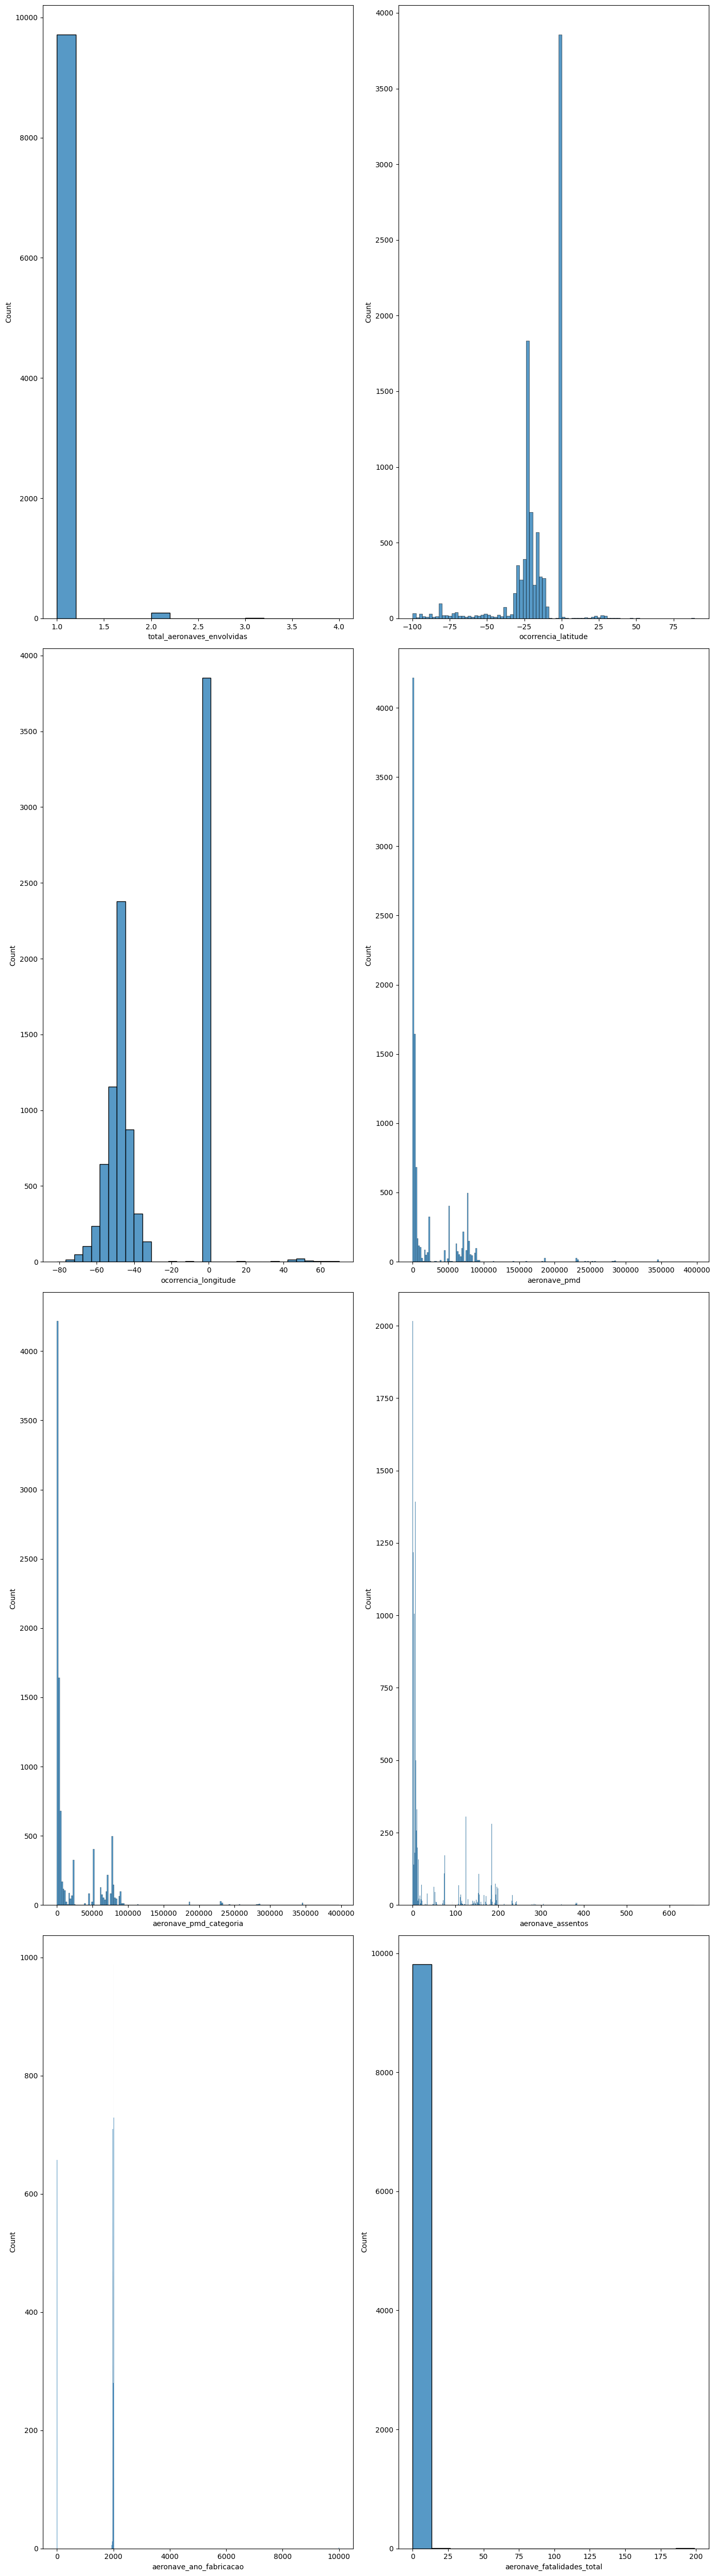

In [45]:
# plota histogramas de variáveis numéricas
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(14, 50), tight_layout=True)

for ax, feature in zip(axs.flatten(), df_number):
    sns.histplot(x=feature, ax=ax, data=df_acidentes_aero)

plt.show()

In [25]:
df_acidentes_aero_ok = df_acidentes_aero[[
        'ocorrencia_classificacao',
        'ocorrencia_cidade',
        'ocorrencia_uf', 
        'ocorrencia_a'
        ]]

KeyError: "['ocorrencia_a'] not in index"